In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

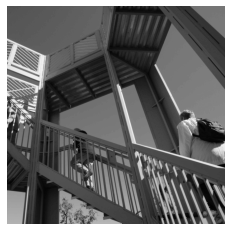

In [8]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [15]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [34]:
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight = 1

In [35]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + i[x-1,y-1] * filter[0][0]
    convolution = convolution + i[x-1,y] * filter[0][1]
    convolution = convolution + i[x-1, y+1] * filter[0][2]
    convolution = convolution + i[x, y-1] * filter[1][0]
    convolution = convolution + i[x, y] * filter[1][1]
    convolution = convolution + i[x, y+1] * filter[1][2]
    convolution = convolution + i[x+1, y-1] * filter[2][0]
    convolution = convolution + i[x+1, y] * filter[2][1]
    convolution = convolution + i[x+1, y+1] * filter[2][2]
    if(convolution< 0):
      convolution = 0
    if(convolution>255):
      convolution = 0
    i_transformed[x,y] = convolution

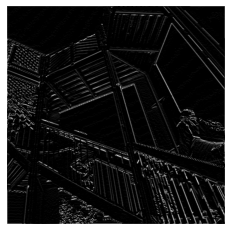

In [36]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

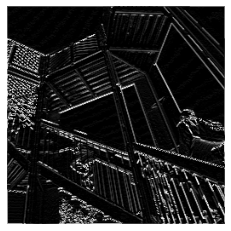

In [37]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))
for x in range(0,size_x,2):
  for y in range(0,size_y,2):
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    pixels.sort(reverse = True)
    newImage[int(x/2),int(y/2)] = pixels[0]
plt.grid(False)
plt.gray()
plt.imshow(newImage)
plt.axis('off')
plt.show()